In [39]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set(style="darkgrid")
import warnings
import calendar
warnings.filterwarnings('ignore')
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
turnstile_df = pd.read_csv("MTA_all_data_processed.csv")
turnstile_df.drop('Unnamed: 0', axis=1, inplace=True)

In [41]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAY,ENTRIES_DELTA,EXITS_DELTA
0,H007,R248,00-00-00,1 AV,L,BMT,07/28/2018,04:00:00,REGULAR,13784312,15461315,2018-07-28 04:00:00,Saturday,112.0,239.0
1,H007,R248,00-00-00,1 AV,L,BMT,07/28/2018,08:00:00,REGULAR,13784389,15461599,2018-07-28 08:00:00,Saturday,77.0,284.0
2,H007,R248,00-00-00,1 AV,L,BMT,07/28/2018,12:00:00,REGULAR,13784871,15462256,2018-07-28 12:00:00,Saturday,482.0,657.0
3,H007,R248,00-00-00,1 AV,L,BMT,07/28/2018,16:00:00,REGULAR,13785532,15463036,2018-07-28 16:00:00,Saturday,661.0,780.0
4,H007,R248,00-00-00,1 AV,L,BMT,07/28/2018,20:00:00,REGULAR,13786043,15463799,2018-07-28 20:00:00,Saturday,511.0,763.0


In [42]:
top_stations_df = pd.DataFrame(turnstile_df.groupby(["STATION","DIVISION", "LINENAME"])
                               ["ENTRIES_DELTA"].sum().sort_values(ascending=False).head(11))
top_stations_df.reset_index(level=0, inplace=True)
top_stations_df.reset_index(level=0, inplace=True)
top_stations_df.reset_index(level=0, inplace=True)


In [43]:
top_stations_df

,LINENAME,DIVISION,STATION,ENTRIES_DELTA
0,4567S,IRT,GRD CNTRL-42 ST,6359892.0
1,ACENQRS1237W,IND,42 ST-PORT AUTH,3452674.0
2,ACE,IND,34 ST-PENN STA,3378685.0
3,LNQR456W,BMT,14 ST-UNION SQ,2942990.0
4,BDFMNQRW,IND,34 ST-HERALD SQ,2887601.0
5,1,PTH,PATH NEW WTC,2689653.0
6,1237ACENQRSW,IRT,TIMES SQ-42 ST,2628574.0
7,7,IRT,FLUSHING-MAIN,2479665.0
8,123ACE,IRT,34 ST-PENN STA,2330782.0
9,ABCD1,IND,59 ST COLUMBUS,2279870.0


In [44]:
zips = pd.read_csv("station_zips.csv")

In [45]:
def fix_names(name):
    temp_name = name.upper()
    replacements = [["1TH", "1"],["1ST", "1"], ["2ND", "2"],["3RD", "3"],["4TH", "4"],["5TH", "5"], 
                    ["6TH", "6"],["7TH", "7"],["8TH", "8"],["9TH", "9"],["0TH", "0"],["COLUMBIA UNIVERSITY", "COLUMBIA"],
                    ["AVENUE", "AV"], ["SQUARE", "SQ"], ["CENTER","CTR"], ["138 ST-3 AVE","3 AV 138 ST"],
                    ["149 ST-3 AV", "3 AV-149 ST"], ["137 ST-CITY COLLEGE", "137 ST CITY COL"], 
                    ["PROSPECT PARK-15 ST","15 ST-PROSPECT"], ['YANKEE STADIUM-161 ST', "161/YANKEE STAD"],
                    ['RAWSON ST-33 ST', "33 ST-RAWSON ST"], ['WHITEHALL ST', "WHITEHALL S-FRY"], 
                    ['WESTCHESTER SQ-EAST TREMONT AV',"WESTCHESTER SQ" ], ['WAKEFIELD-241 ST', "WAKEFIELD/241"],
                    ['WEST 8 ST', "W 8 ST-AQUARIUM"], ['WEST 4 ST', 'W 4 ST-WASH SQ'], 
                    ['VERNON BLVD-JACKSON AV',"VERNON-JACKSON" ],["5 AV-53 ST","5 AV/53 ST"],["5 AV","5 AVE"],
                    ["59 ST-COLUMBUS CIRCLE","59 ST COLUMBUS"],["WOODSIDE AV-61 ST","61 ST WOODSIDE"],
                    ["63 DRIVE-REGO PARK","63 DR-REGO PARK"],["66 ST-LINCOLN CTR","66 ST-LINCOLN"],
                    ["68 ST-HUNTER COLLEGE","68ST-HUNTER CO"],["AQUEDUCT-NORTH CONDUIT AV","AQUEDUCT N.COND"],
                    ["AQUEDUCT RACETRACK","AQUEDUCT RACETR"],["ASTOR PLACE","ASTOR PL"],
                    ["ASTORIA BLVD-HOYT AV","ASTORIA BLVD"],["DITMARS BLVD","ASTORIA DITMARS"],
                    ["ATLANTIC AV-BARCLAYS CTR","ATL AV-BARCLAY"],["BROADWAY-LAFAYETTE ST","B'WAY-LAFAYETTE"],
                    ["BAY PARKWAY","BAY PKWY"],["BEDFORD PARK BLVD","BEDFORD PK BLVD"],
                    ["BEDFORD-NOSTRAND AVS","BEDFORD-NOSTRAN"],["BEVERLY RD","BEVERLEY ROAD"],
                    ["BOTANIC GARDENS","BOTANIC GARDEN"],["BRIARWOOD-VAN WYCK BLVD","BRIARWOOD"],
                    ["BROADWAY JUNCTION-EAST NEW YORK","BROADWAY JCT"],["BROOKLYN BRIDGE-CITY HALL","BROOKLYN BRIDGE"],
                    ["CANARSIE - ROCKAWAY PARKWAY","CANARSIE-ROCKAW"],["CATHEDRAL PARKWAY-110 ST","CATHEDRAL PKWY"],
                    ["CLINTON-WASHINGTON AVS","CLINTON-WASH AV"],["DELANCEY ST","DELANCEY/ESSEX"],
                    ["EAST 143 ST-ST MARY'S ST","E 143/ST MARY'S"],["EAST 149 ST","E 149 ST"],
                    ["EAST 180 ST","E 180 ST"],["EASTCHESTER-DYRE AV","EASTCHSTER/DYRE"],
                    ["EASTERN PARKWAY-BROOKLYN MUSEUM","EASTN PKWY-MUSM"],["HARLEM-148 ST","HARLEM 148 ST"],
                    ["FAR ROCKAWAY-MOTT AV","FAR ROCKAWAY"],["FLATBUSH AV-BROOKLYN COLLEGE","FLATBUSH AV-B.C"],
                    ["FLUSHING-MAIN ST","FLUSHING-MAIN"],["FOREST AV","FOREST AVE"],
                    ["FOREST HILLS-71 AV","FOREST HILLS 71"],["FORT HAMILTON PARKWAY","FT HAMILTON PKY"],
                    ["GRAND ARMY PLAZA","GRAND ARMY PLAZ"],["GRAND AV-NEWTOWN","GRAND-NEWTOWN"],
                    ["HOWARD BEACH","HOWARD BCH JFK"],["HOYT & SCHERMERHORN","HOYT-SCHER"],
                    ["HUNTERS POINT","HUNTERS PT AV"],["INWOOD - 207 ST","INWOOD-207 ST"],
                    ["JAMAICA-179 ST","JAMAICA 179 ST"],["JACKSON HEIGHTS-ROOSEVELT AVE","JKSN HT-ROOSVLT"],
                    ["JAMAICA-VAN WYCK","JAMAICA VAN WK"],["KEW GARDENS-UNION TURNPIKE","KEW GARDENS"],
                    ["KINGS HIGHWAY","KINGS HWY"],["KNICKERBOCKER AV","KNICKERBOCKER"],["KOSCIUSKO ST","KOSCIUSZKO ST"],
                    ["NORWOOD-205 ST","NORWOOD 205 ST"],["OCEAN PARKWAY","OCEAN PKWY"],["PELHAM PARKWAY","PELHAM PKWY"],
                    ["QUEENSBORO PLAZA","QUEENSBORO PLZ"],["PARKCHESTER-EAST 177 ST","PARKCHESTER"],
                    ["LEXINGTON AV-53 ST","LEXINGTON AV/53"],["LEXINGTON AV","LEXINGTON AV/63"],
                    ["MARBLE HILL-225 ST","MARBLE HILL-225"],["METS - WILLETS POINT","METS-WILLETS PT"],
                    ["MORRISON AV-SOUNDVIEW AV","MORISN AV/SNDVW"],["MOSHOLU PARKWAY","MOSHOLU PKWY"],
                    ["MYRTLE-WILLOUGHBY AVS","MYRTLE-WILLOUGH"],["MYRTLE AV","MYRTLE-WYCKOFF"],
                    ["NEPTUNE AV-VAN SICLEN","NEPTUNE AV"],["238 ST-NEREID AV","NEREID AV"],
                    ["ROCKAWAY PARK-BEACH 116","ROCKAWAY PARK B"],["ROOSEVELT ISLAND","ROOSEVELT ISLND"],
                    ["SENECA AV","SENECA AVE"],["SUTPHIN BLVD-ARCHER AV - JFK","SUTPHIN-ARCHER"],
                    ["SUTTER AV","SUTTER AV-RUTLD"],["VAN CORTLANDT PARK-242 ST","V.CORTLANDT PK"],
                    ["VAN SICLEN AV","VAN SICLEN AVE"], ["AV H",'AVENUE H'], ["AV I",'AVENUE I'], ["AV J",'AVENUE J'],
                    ["AV M",'AVENUE M'], ["AV N",'AVENUE N'], ["AV P",'AVENUE P'], ["AV U",'AVENUE U'], 
                    ["AV X",'AVENUE X']]
    
       
    for x in replacements:
        temp_name = temp_name.replace(x[0], x[1])
    return temp_name

In [46]:
zips["STATION"] = zips["STATION"].apply(fix_names)

In [47]:
name_zip_mapping = pd.read_csv("name_zip_mapping.csv")

In [48]:
def add_zip(cols):
    division = cols[0]
    station = cols[1]
    df = zips[(zips["STATION"]==station) &(zips["DIVISION"]==division)]
    if df.shape[0]==1:
        return df["zip"].values[0]
    df = name_zip_mapping[(name_zip_mapping["name"]==station)]    
    if df.shape[0]==1:
        return df["zip"].values[0]
    

In [49]:
top_stations_df["zip"] = top_stations_df[["DIVISION", "STATION"]].apply(add_zip, axis=1)

In [50]:
read_dictionary = np.load('zipcode_to_income_dict.npy').item()
read_dictionary[10119] = 86347
read_dictionary[10020] = 90151
def add_income(zip):
    if zip in read_dictionary.keys():
        return read_dictionary[zip]
top_stations_df["Per Capita Income ($)"] = top_stations_df["zip"].apply(add_income)

In [51]:
read_dictionary = np.load('zipcode_to_charity_dict.npy').item()
def add_charity(zip):
    read_dictionary[10119] = 46736
    if zip in read_dictionary.keys():
        return read_dictionary[zip]
top_stations_df["Per Capita Charity ($)"] = top_stations_df["zip"].apply(add_charity)

In [52]:
top_stations_df.drop(["LINENAME","DIVISION"], axis=1, inplace=True)
top_stations_df.head()

,STATION,ENTRIES_DELTA,zip,Per Capita Income ($),Per Capita Charity ($)
0,GRD CNTRL-42 ST,6359892.0,10017,103346,31814
1,42 ST-PORT AUTH,3452674.0,10036,77208,11938
2,34 ST-PENN STA,3378685.0,10119,86347,46736
3,14 ST-UNION SQ,2942990.0,10003,85199,7792
4,34 ST-HERALD SQ,2887601.0,10001,86347,7597


In [53]:
top_stations_df["Daily Riders"] = top_stations_df["ENTRIES_DELTA"]//56


In [54]:
top_stations_df["Daily Riders"][2] = top_stations_df["Daily Riders"][2]+top_stations_df["Daily Riders"][8]
top_stations_df = top_stations_df.drop(8)

In [55]:
top_stations_df=top_stations_df.sort_values(by="Daily Riders", ascending=False)
top_stations_df

,STATION,ENTRIES_DELTA,zip,Per Capita Income ($),Per Capita Charity ($),Daily Riders
0,GRD CNTRL-42 ST,6359892.0,10017,103346,31814,113569.0
2,34 ST-PENN STA,3378685.0,10119,86347,46736,101954.0
1,42 ST-PORT AUTH,3452674.0,10036,77208,11938,61654.0
3,14 ST-UNION SQ,2942990.0,10003,85199,7792,52553.0
4,34 ST-HERALD SQ,2887601.0,10001,86347,7597,51564.0
5,PATH NEW WTC,2689653.0,10007,166343,9349,48029.0
6,TIMES SQ-42 ST,2628574.0,10036,77208,11938,46938.0
7,FLUSHING-MAIN,2479665.0,11354,23503,2628,44279.0
9,59 ST COLUMBUS,2279870.0,10023,111473,15207,40711.0
10,JKSN HT-ROOSVLT,2215173.0,11372,26735,2104,39556.0


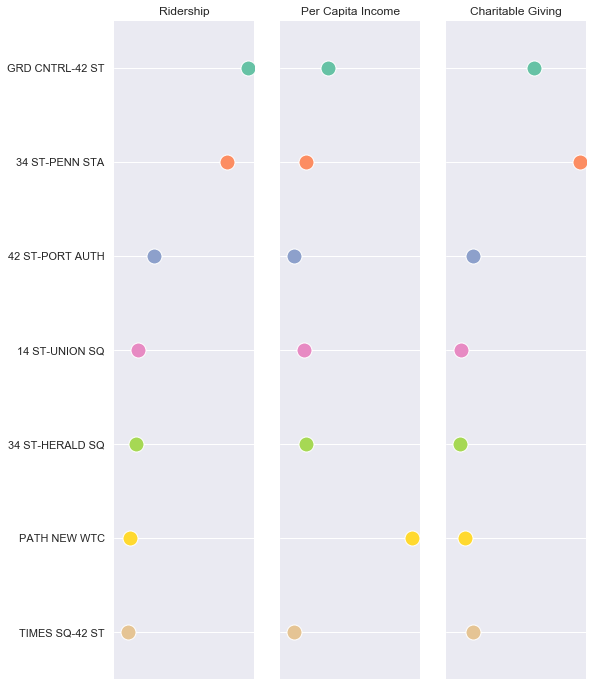

In [56]:
# Make the PairGrid
g = sns.PairGrid(top_stations_df.sort_values("Daily Riders", ascending=False).head(7),
                 x_vars=["Daily Riders", "Per Capita Income ($)","Per Capita Charity ($)"], y_vars=["STATION"],
                 height=10, aspect=.25,  palette="Set2")

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h",
      palette="Set2", linewidth=1, edgecolor="w", jitter=False)


# Use semantically meaningful titles for the columns
titles = ["Ridership", "Per Capita Income", "Charitable Giving"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.set_xlabel('') 
    ax.set_ylabel('') 
    ax.set_xticks([])

sns.despine(left=True, bottom=True)
g.savefig("compare.png")


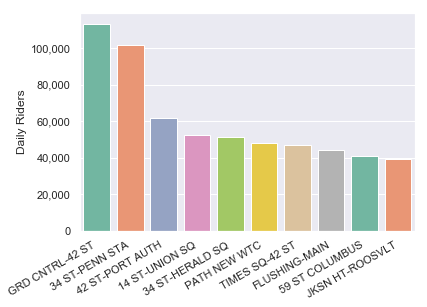

In [57]:
top_sorted_df = top_stations_df.sort_values("Daily Riders", ascending=False)
ax = sns.barplot(x="STATION", y="Daily Riders", data=top_sorted_df, palette="Set2")

ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right')
ax.set_xlabel('') 

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig("riders.png")


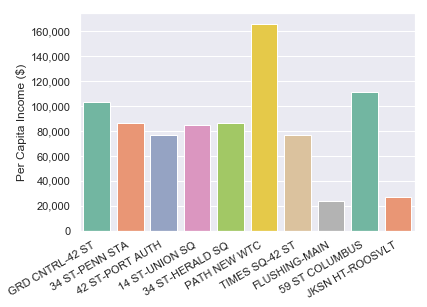

In [58]:
top_sorted_df = top_stations_df.sort_values("Daily Riders", ascending=False)
ax = sns.barplot(x="STATION", y="Per Capita Income ($)", data=top_sorted_df, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right')
ax.set_xlabel('') 
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig("income.png")


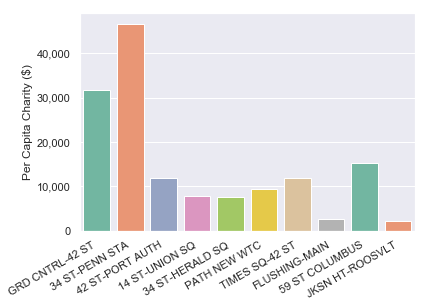

In [59]:
top_sorted_df = top_stations_df.sort_values("Daily Riders", ascending=False)
ax = sns.barplot(x="STATION", y="Per Capita Charity ($)", data=top_sorted_df, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right')
ax.set_xlabel('') 
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig("charity.png")


In [60]:
number_of_weeks=8
# Convert date from str to datetime
turnstile_df['DATETIME'] = turnstile_df['DATETIME'].apply(pd.to_datetime)

# Rename columns for plotting
turnstile_df.rename(
  columns={
    'DAY':'Day', 'ENTRIES_DELTA':'Ridership'
  },
  inplace=True
)



In [61]:
day_df = turnstile_df[turnstile_df.STATION.isin(['GRD CNTRL-42 ST', '42 ST-PORT AUTH', 
                                        '34 ST-PENN STA', 'PATH NEW WTC'])]

In [62]:
day_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Day,Ridership,EXITS_DELTA
228553,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,04:00:00,REGULAR,2069274,2147854,2018-07-28 04:00:00,Saturday,5.0,25.0
228554,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,08:00:00,REGULAR,2069299,2147971,2018-07-28 08:00:00,Saturday,25.0,117.0
228555,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,12:00:00,REGULAR,2069393,2148173,2018-07-28 12:00:00,Saturday,94.0,202.0
228556,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,16:00:00,REGULAR,2069480,2148425,2018-07-28 16:00:00,Saturday,87.0,252.0
228557,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,20:00:00,REGULAR,2069582,2148735,2018-07-28 20:00:00,Saturday,102.0,310.0
228558,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,04:00:00,REGULAR,5648656,15956938,2018-07-28 04:00:00,Saturday,28.0,91.0
228559,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,08:00:00,REGULAR,5648682,15957132,2018-07-28 08:00:00,Saturday,26.0,194.0
228560,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,12:00:00,REGULAR,5648861,15957736,2018-07-28 12:00:00,Saturday,179.0,604.0
228561,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,16:00:00,REGULAR,5649083,15958542,2018-07-28 16:00:00,Saturday,222.0,806.0
228562,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/28/2018,20:00:00,REGULAR,5649328,15959384,2018-07-28 20:00:00,Saturday,245.0,842.0


In [63]:
day_df['Ridership'] = day_df.groupby(['Day', 'STATION'])['Ridership'].transform(
                          lambda x: (x.sum()/(number_of_weeks)))

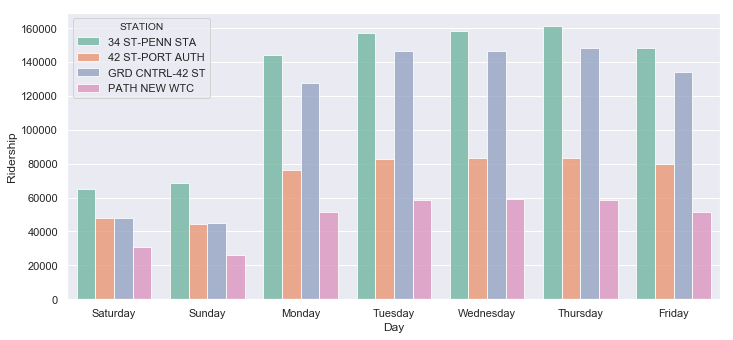

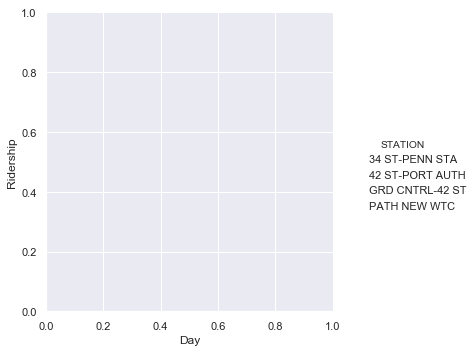

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 5.27)

sns.factorplot(x='Day', y='Ridership', alpha = 0.8, hue='STATION', palette="Set2", 
               data=day_df, kind='bar', ax=ax)


In [71]:
turnstile_df['Time of Day'] = turnstile_df['DATETIME'].dt.hour

In [72]:
time_df = turnstile_df[turnstile_df.STATION.isin(['GRD CNTRL-42 ST', '42 ST-PORT AUTH', 
                                        '34 ST-PENN STA', 'PATH NEW WTC'])]

time_df['Ridership']  = time_df.groupby(['Time of Day', 'STATION'])['Ridership'].transform(
                            lambda x: (x.sum()/number_of_weeks))
# time_df.sample(10)

In [73]:
time_df_top2 = time_df[time_df.STATION.isin(['GRD CNTRL-42 ST', '42 ST-PORT AUTH'])]
time_df_34   = time_df[time_df.STATION.isin(['34 ST-PENN STA', 'PATH NEW WTC'])]

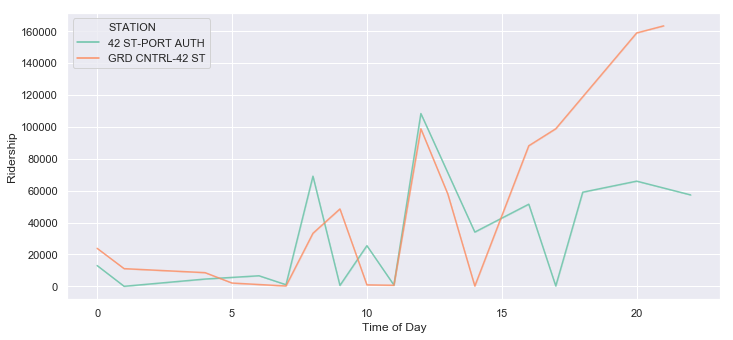

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 5.27)

sns.lineplot(x='Time of Day', y='Ridership', hue='STATION', 
             palette="Set2", alpha=0.8, data=time_df_top2, ax=ax)

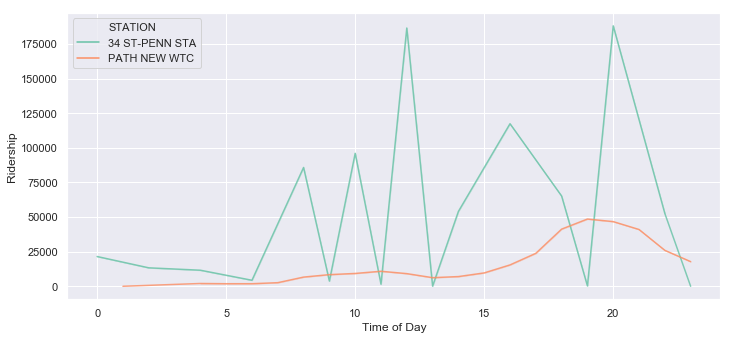

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 5.27)

sns.lineplot(x='Time of Day', y='Ridership', hue='STATION', 
             palette="Set2", alpha=0.8, data=time_df_34, ax=ax)